In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

conn = sql.connect("rainfall.db")
df = pd.read_csv("RF_SUB_1901-2021.csv")

df.to_sql("rainfall", conn, if_exists="replace", index=False)
conn.close()

In [43]:
conn = sql.connect("rainfall.db")
cursor = conn.cursor()
cursor.execute("select * from rainfall where subdivision ='ANDAMAN & NICOBAR ISLAND';")
display(cursor.fetchall())
display(cursor.description)
conn.close()

[('ANDAMAN & NICOBAR ISLAND', 1901, 517.5, 365.1, 481.1, 332.6),
 ('ANDAMAN & NICOBAR ISLAND', 1902, 537.1, 228.9, 753.7, 666.2),
 ('ANDAMAN & NICOBAR ISLAND', 1903, 479.9, 728.4, 326.7, 339.0),
 ('ANDAMAN & NICOBAR ISLAND', 1904, 495.1, 502.0, 160.1, 820.4),
 ('ANDAMAN & NICOBAR ISLAND', 1905, 628.7, 368.7, 330.5, 297.0),
 ('ANDAMAN & NICOBAR ISLAND', 1906, 733.3, 247.7, 320.5, 164.3),
 ('ANDAMAN & NICOBAR ISLAND', 1907, 305.2, 443.9, 377.6, 200.4),
 ('ANDAMAN & NICOBAR ISLAND', 1908, 693.6, 481.4, 699.9, 428.8),
 ('ANDAMAN & NICOBAR ISLAND', 1910, 472.7, 264.3, 337.4, 626.6),
 ('ANDAMAN & NICOBAR ISLAND', 1911, 649.0, 253.0, 187.1, 464.5),
 ('ANDAMAN & NICOBAR ISLAND', 1912, 549.8, 468.9, 370.3, 386.2),
 ('ANDAMAN & NICOBAR ISLAND', 1913, 530.0, 280.8, 205.8, 580.1),
 ('ANDAMAN & NICOBAR ISLAND', 1914, 383.3, 792.8, 520.5, 310.8),
 ('ANDAMAN & NICOBAR ISLAND', 1915, 334.7, 269.0, 317.2, 429.8),
 ('ANDAMAN & NICOBAR ISLAND', 1916, 450.1, 317.3, 425.0, 561.2),
 ('ANDAMAN & NICOBAR ISLA

(('subdivision', None, None, None, None, None, None),
 ('YEAR', None, None, None, None, None, None),
 ('JUN', None, None, None, None, None, None),
 ('JUL', None, None, None, None, None, None),
 ('AUG', None, None, None, None, None, None),
 ('SEP', None, None, None, None, None, None))

In [44]:
csv = pd.read_csv("RF_SUB_1901-2021.csv")
df = pd.DataFrame(csv)
# display(df)
df_mean = df.groupby("subdivision").agg("mean").drop("YEAR", axis=1)
df_mean["JUN-SEP"] = (df_mean.JUN + df_mean.JUL + df_mean.AUG + df_mean.SEP)/4
display(df_mean)
display(df_mean.index)
# df_mean.sort_values(by="JUN-SEP", ascending=False).reset_index().drop("index", axis=1).plot(x="subdivision", y="JUN-SEP", kind="bar")

,JUN,JUL,AUG,SEP,JUN-SEP
subdivision,,,,,
ANDAMAN & NICOBAR ISLAND,460.635345,386.590517,395.755172,430.117241,418.274569
ARUNACHAL PRADESH,625.623301,679.360194,484.841748,426.707767,554.133252
ASSAM & MEGHALAYA,510.221488,498.933058,402.451240,313.387603,431.248347
BIHAR,174.410744,325.595041,295.883471,218.062810,253.488017
CHATHISGARH,197.214050,388.436364,382.174380,218.420661,296.561364
COASTAL ANDHRA PRADESH & YANAM,100.516529,151.846281,151.746281,159.780165,140.972314
COASTAL KARNATAKA,837.918182,1117.277686,717.400826,304.620661,744.304339
EAST MADHYA PRADESH,140.793388,370.522314,369.003306,195.059504,268.844628
EAST RAJASTHAN,64.569421,225.947934,222.077686,99.877686,153.118182


Index(['ANDAMAN & NICOBAR ISLAND', 'ARUNACHAL PRADESH', 'ASSAM & MEGHALAYA',
       'BIHAR', 'CHATHISGARH', 'COASTAL ANDHRA PRADESH & YANAM',
       'COASTAL KARNATAKA', 'EAST MADHYA PRADESH', 'EAST RAJASTHAN',
       'EAST UTTAR PRADESH', 'GANGETIC W.BENGAL', 'GUJARAT REGION',
       'HARYANA, DELHI & CHANDIGARH', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR',
       'JHARKHAND', 'KERALA & MAHE', 'KONKAN & GOA', 'LAKSHDWEEP',
       'MADHYA MAHARASHTRA', 'MARATHWADA',
       'NAGALAND, MANIPUR, MIZORAM, TRIPURA', 'NORTH INTERIOR KARNATAKA',
       'ORISSA', 'PUNJAB', 'RAYALSEEMA', 'SAURASHTRA & KUTCH',
       'SOUTH INTERIOR KARNATAKA', 'SUB HIMALAYAN W.BENGAL & SIKKIM',
       'TAMIL NADU, PUDUCHERRY & KARAIKAL', 'TELANGANA', 'UTTARANCHAL',
       'VIDARBHA', 'WEST MADHYA PRADESH', 'WEST RAJASTHAN',
       'WEST UTTAR PRADESH'],
      dtype='object', name='subdivision')

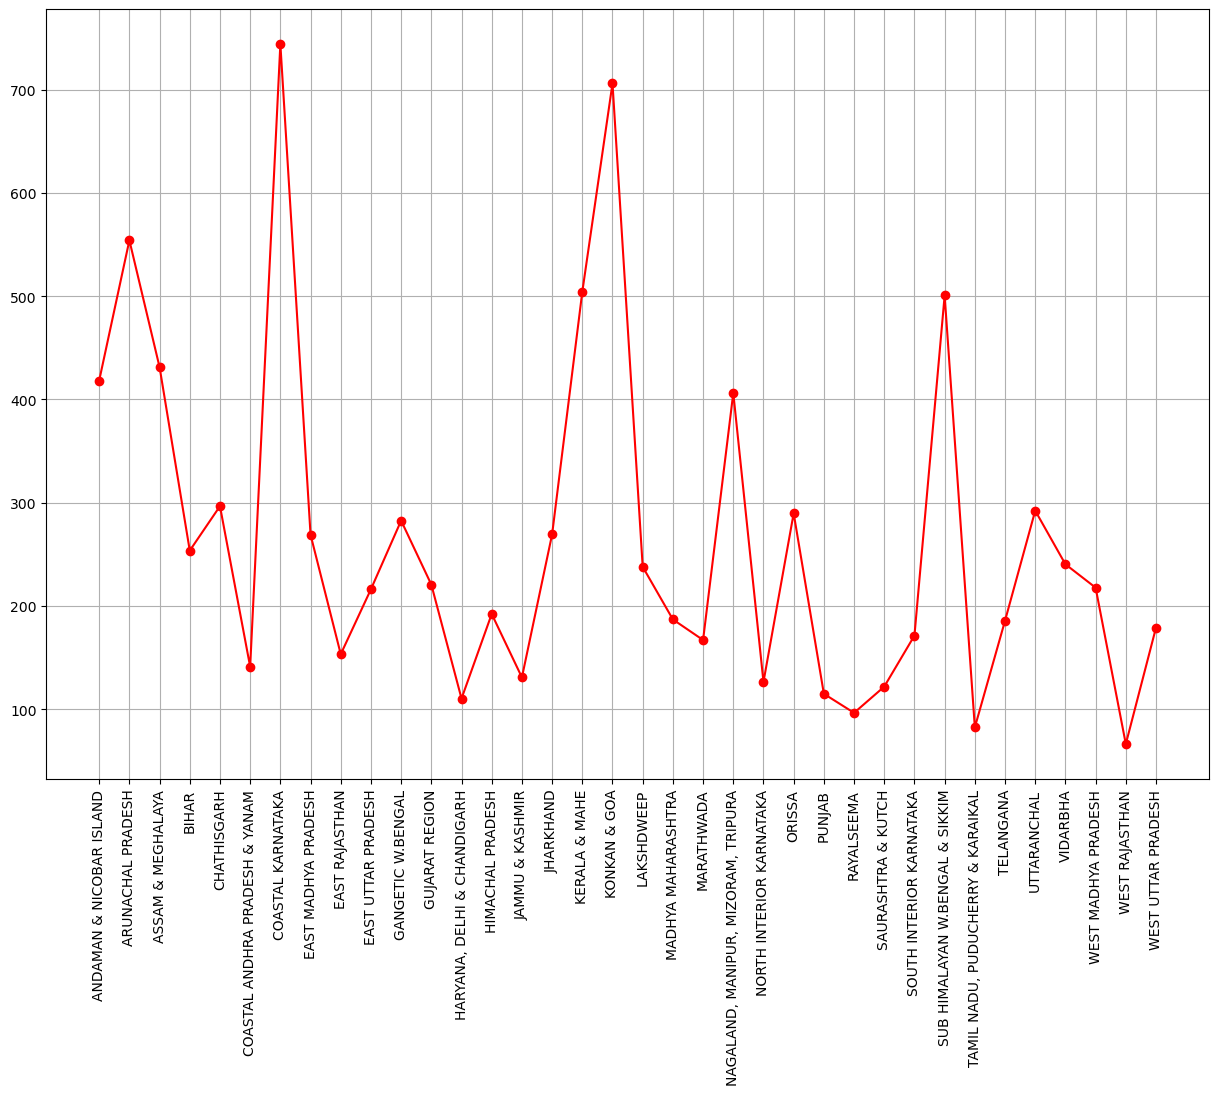

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(df_mean.index, df_mean["JUN-SEP"], marker="o", color="red")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [1]:
import pandas as pd

# Load the dataset
rainfall_data = pd.read_csv('./RF_SUB_1901-2021.csv')

# Calculate total rainfall for each year
rainfall_data['Total_Rainfall'] = rainfall_data[['JUN', 'JUL', 'AUG', 'SEP']].sum(axis=1)

# Calculate mean rainfall per subdivision over the years
mean_rainfall = rainfall_data.groupby('subdivision')['Total_Rainfall'].mean()

# Define thresholds for classification
drought_threshold = mean_rainfall.quantile(0.25)
flood_threshold = mean_rainfall.quantile(0.75)

# Classify regions
mean_rainfall_classified = mean_rainfall.apply(
    lambda x: 'Drought-prone' if x < drought_threshold else ('Flood-prone' if x > flood_threshold else 'Normal')
)
print(mean_rainfall_classified)

subdivision
ANDAMAN & NICOBAR ISLAND                 Flood-prone
ARUNACHAL PRADESH                        Flood-prone
ASSAM & MEGHALAYA                        Flood-prone
BIHAR                                         Normal
CHATHISGARH                              Flood-prone
COASTAL ANDHRA PRADESH & YANAM         Drought-prone
COASTAL KARNATAKA                        Flood-prone
EAST MADHYA PRADESH                           Normal
EAST RAJASTHAN                                Normal
EAST UTTAR PRADESH                            Normal
GANGETIC W.BENGAL                             Normal
GUJARAT REGION                                Normal
HARYANA, DELHI & CHANDIGARH            Drought-prone
HIMACHAL PRADESH                              Normal
JAMMU & KASHMIR                        Drought-prone
JHARKHAND                                     Normal
KERALA & MAHE                            Flood-prone
KONKAN & GOA                             Flood-prone
LAKSHDWEEP                        

In [2]:
import matplotlib.pyplot as plt

# Select a subdivision, e.g., "Kerala"
kerala_rainfall = rainfall_data[rainfall_data['subdivision'] == 'Kerala']

# Plot the total annual rainfall
plt.figure(figsize=(10, 6))
plt.plot(kerala_rainfall['year'], kerala_rainfall['Total_Rainfall'], marker='o')
plt.title('Annual Rainfall in Kerala (1901-2021)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()


KeyError: 'year'

<Figure size 1000x600 with 0 Axes>